## Introduksi Projek 

Perusahaan tambang OilyGiant ingin mencari tempat terbaik untuk mengembangkan 200 titik sumur minyak baru. Projek ini dilakukan dengan tujuan untuk menentukan titik tersebut untuk memaksimalkan profit. 

## Langkah -langkah projek

1. Pengunduhan dan penyiapan data
2. Latih dan uji model untuk setiap wilayah di 'geo_data_0.csv':
         2.1. Pisahkan data menjadi training set dan validation set dengan rasio 75:25.
         2.2. Latih model dan buat prediksi untuk validation set.
         2.3. Simpan prediksi dan jawaban yang benar untuk validation set.
         2.4. Tampilkan prediksi volume rata-rata pemesanan dan RMSE dari model.
         2.5. Analisis hasilnya.
         2.6. Lakukan dan jalankan langkah 2.1-2.5 untuk file 'geo_data_1.csv' dan 'geo_data_2.csv'.
3. Lakukan persiapan untuk menghitung laba:
         3.1. Simpan semua nilai yang dibutuhkan untuk perhitungan laba pada variabel terpisah.
         3.2. Dengan investasi 100 juta untuk 200 sumur minyak, sebuah sumur minyak rata-rata harus menghasilkan setidaknya 500 ribu USD untuk menghindari kerugian (ini setara dengan 111,1 unit). Bandingkan jumlah ini dengan jumlah rata-rata pemesanan di setiap wilayah.
         3.3. Berikan kesimpulan terkait persiapan yang kamu lakukan dalam langkah penghitungan laba.
4. Buat sebuah fungsi untuk menghitung laba dari kumpulan sumur minyak terpilih dan prediksi model:
         4.1. Tuliskan sebuah fungsi untuk menghitung keuntungan dari sekumpulan sumur minyak terpilih dan prediksi modelnya: Pilih 200 sumur dengan nilai prediksi tertinggi dari masing-masing 3 wilayah (file 'csv').
         4.2. Buat rangkuman tentang target volume pemesanan berdasarkan prediksi ini. Simpan prediksi untuk 200 sumur di masing-masing dari 3 wilayah.
         4.3. Kesimpulan: saran sebuah wilayah yang cocok untuk pengembangan sumur minyak dan berikan alasan. Hitung keuntungan untuk volume pemesanan yang diterima.
5. Hitung risiko dan keuntungan untuk setiap wilayah:
         5.1. Dengan menggunakan prediksi pada langkah 4.2, gunakan teknik bootstrapping dengan 1.000 sampel untuk menemukan distribusi profit.
         5.2. Temukan rata-rata profit, interval kepercayaan 95%, dan risiko kerugian. Kerugian adalah keuntungan negatif, hitung sebagai probabilitas dan kemudian nyatakan sebagai persentase.
         5.3. Sampaikan kesimpulan: saran sebuah wilayah yang cocok untuk pengembangan sumur minyak dan berikan alasan atas pilihan tersebut. Apakah pilihan ini sesuai dengan pilihan sebelumnya di poin 4.3?

## Deskripsi Data

Data eksplorasi geologi untuk ketiga wilayah disimpan dalam beberapa file:

    geo_data_0.csv. untuk wilayah 0
    geo_data_1.csv. untuk wilayah 1
    geo_data_2.csv. untuk wilayah 2
    id — ID unik sumur minyak
    f0, f1, f2 — tiga fitur titik wilayah (makna spesifiknya sebenarnya tidak penting, tetapi fitur itu sendiri sangat penting)
    product — volume cadangan di dalam sumur minyak (1 unit = 1.000 barel).

## Proses Projek

## 1. Pemuatan Library

Pada tahapan ini, library utama akan diimport, sementara library yang spesifik untuk tugas tertentu akan diimport dibagian pemrosesannya.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Pemuatan dan Observasi Data Awal

Pada tahapan ini, data awal akan diobservasi dan dianalisis nilainya.

In [2]:
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [4]:
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
print('-----------------------------------------------------')
print(geo_0.sample(5))
print('/n')
print('-----------------------------------------------------')
print(geo_1.sample(5))
print('/n')
print('-----------------------------------------------------')
print(geo_2.sample(5))

-----------------------------------------------------
          id        f0        f1        f2     product
28354  mLJd9  0.990360 -0.529389  2.084178   84.165691
89638  nG9v6  0.333365  0.344705  3.707060   90.701599
4778   27wEj -0.926030  0.472498  7.191221   83.205455
37206  sesZM -0.630270  1.037025  3.777074  123.217186
93002  g52eV  1.439745 -0.407912  3.638664  149.115513
/n
-----------------------------------------------------
          id        f0        f1        f2     product
65637  atl36 -5.638869 -7.974506  1.996122   57.085625
26757  OXhD4 -7.759888 -7.764566  4.999725  137.945408
98516  nuyEG -0.523215 -8.747146  3.996028  110.992147
91998  rp5wI -4.482981 -8.312114 -0.007612    3.179103
35418  4RWck -2.930287 -4.298345  5.001997  137.945408
/n
-----------------------------------------------------
          id        f0        f1         f2     product
43597  pHW2i  0.720631 -2.413279  11.474532  135.644984
68322  dZfZg  0.425891  3.292865  -2.647476   78.230211
1799

In [6]:
print('-----------------------------------------------------')
print(geo_0.shape)
print('/n')
print('-----------------------------------------------------')
print(geo_1.shape)
print('/n')
print('-----------------------------------------------------')
print(geo_2.shape)

-----------------------------------------------------
(100000, 5)
/n
-----------------------------------------------------
(100000, 5)
/n
-----------------------------------------------------
(100000, 5)


In [7]:
print('-----------------------------------------------------')
print(geo_0.describe())
print('/n')
print('-----------------------------------------------------')
print(geo_1.describe())
print('/n')
print('-----------------------------------------------------')
print(geo_2.describe())

-----------------------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
/n
-----------------------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.35

In [8]:
print('-----------------------------------------------------')
geo_0.info() , '/n'
print('-----------------------------------------------------')
geo_1.info() , '/n'
print('-----------------------------------------------------')
geo_2.info()

-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------

In [9]:
print('-----------------------------------------------------')
print(geo_0.isna().sum())
print('/n')
print('-----------------------------------------------------')
print(geo_1.isna().sum())
print('/n')
print('-----------------------------------------------------')
print(geo_2.isna().sum())

-----------------------------------------------------
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
/n
-----------------------------------------------------
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
/n
-----------------------------------------------------
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [10]:
print('-----------------------------------------------------')
print(geo_0.duplicated().sum())
print('/n')
print('-----------------------------------------------------')
print(geo_1.duplicated().sum())
print('/n')
print('-----------------------------------------------------')
print(geo_2.duplicated().sum())

-----------------------------------------------------
0
/n
-----------------------------------------------------
0
/n
-----------------------------------------------------
0


### 2.1 Kesimpulan Bab

Berdasarkan observasi yang dilakukan pada data awal, semua data memiliki tipe data yang sudah tepat dan tidak ada data yang kosong sehingga data tidak memerlukan perbaikan

## Eksplorasi Analisis Data

### Korelasi Data Numerikal

In [11]:
num_0 = geo_0.copy().drop(['id'], axis= 1)
num_1 = geo_1.copy().drop(['id'], axis= 1)
num_2 = geo_2.copy().drop(['id'], axis= 1)

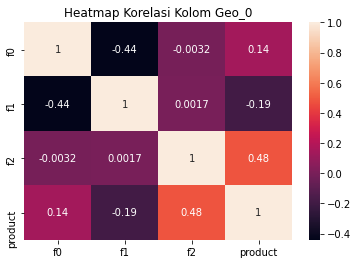

In [12]:
sns.heatmap(num_0.corr(), annot = True)
plt.title('Heatmap Korelasi Kolom Geo_0')
plt.show()

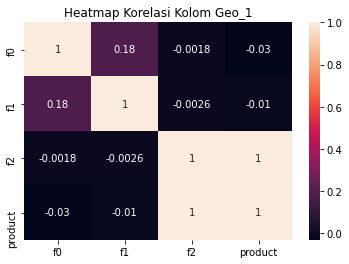

In [13]:
sns.heatmap(num_1.corr(), annot = True)
plt.title('Heatmap Korelasi Kolom Geo_1')
plt.show()

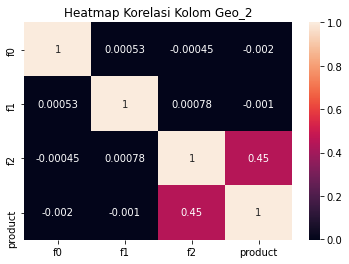

In [14]:
sns.heatmap(num_2.corr(), annot= True)
plt.title('Heatmap Korelasi Kolom Geo_2')
plt.show()

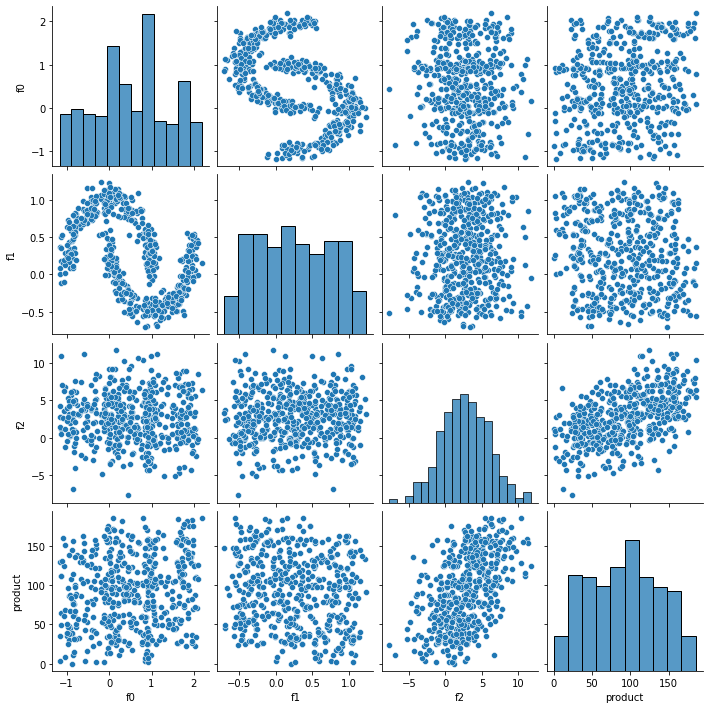

In [15]:
sns.pairplot(num_0.sample(500))

plt.show()

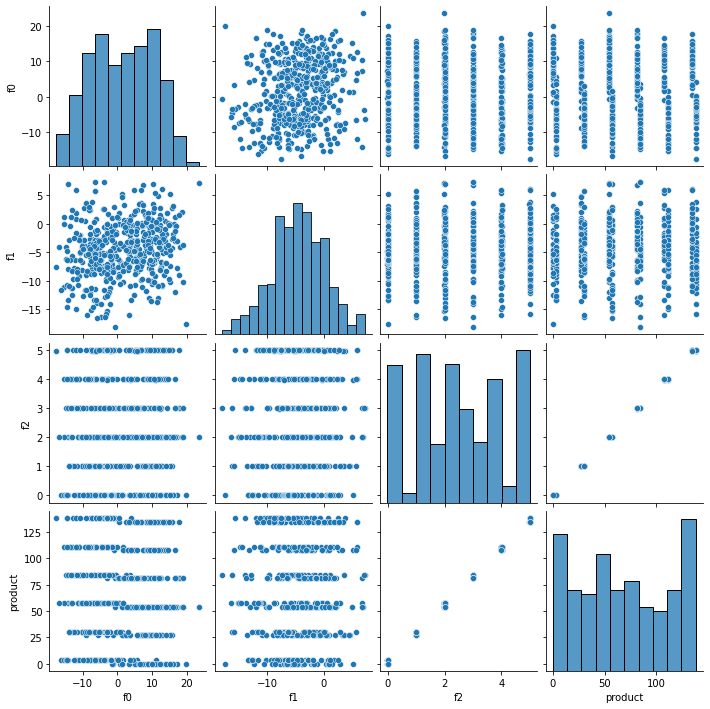

In [16]:
sns.pairplot(num_1.sample(500))
plt.show()

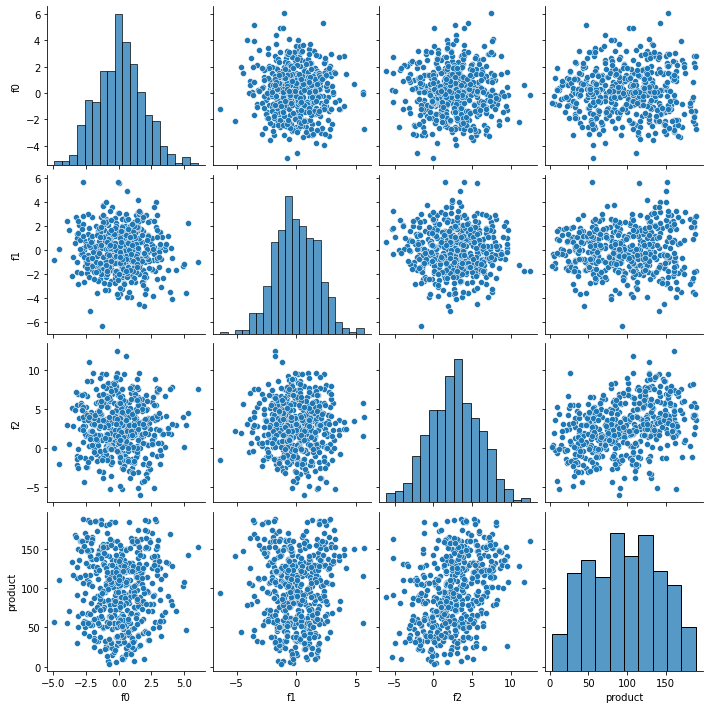

In [17]:
sns.pairplot(num_2.sample(500))

plt.show()

Berdasarkan plotting matriks korelasi dan sebaran data eksplorasi, terlihat bahwa setiap fitur memiliki korelasi yang bervariasi untuk setiap wilayah. dengan data cenderung memiliki korelasi yang tidak signifikan sedangkan korelasi fitur di geo_2 memiliki kecenderungan pada nilai tertentu. Khusus untuk data pada lokasi geo_1, fitur-fitur 0 dan 1 tidak memiliki korelasi sama sekali sedangkan fitur 2 memiliki korelasi sebanding terhadap nilai target.

## Data Pre-Processing dan Pelatihan Model

Pada tahapan ini, data dari setiap file lokasi (geo_0, geo_1, geo_2) akan dipecah menjadi 4 file, yaitu fitur pelatihan, fitur validasi, target pelatihan, dan target validasi. Selain itu, setiap kolom fitur perlu distandarkan terlebih dahulu untuk mencegah ketidakseimbangan data. Data-data tersebut kemudian akan digunakan untuk melatih model. Hasil prediksi model terhadap data validasi akan disimpan untuk tahapan berikutnya. Untuk projek ini akan digunakan dua algoritma model regresi yaitu regresi linear dan regresi pohon pemilihan.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [21]:
from sklearn.model_selection import train_test_split

### Penyiapan data dan pelatihan data geo_0

#### Pelatihan Model Data dengan algoritma Linear Regression

In [22]:
# Pembuatan program model linear regresi
def model_creation(data):
    scaler = StandardScaler()
    features = data.drop(['id','product'], axis= 1)
    target = data['product']
    tf, vf, tt, vt = train_test_split(features, target, test_size = 0.25, random_state = 12345)
    scaler.fit(tf)
    tf = scaler.transform(tf)
    vf = scaler.transform(vf)
    
    model = LinearRegression()
    model.fit(tf, tt)
    train_predict = model.predict(tf)
    valid_predict = model.predict(vf)
    
    # Model evaluation 
    train_mrse = np.sqrt(mean_squared_error(tt, train_predict))
    valid_mrse = np.sqrt(mean_squared_error(vt, valid_predict))
    valid_mean = vt.mean()
    valid_pred_mean = valid_predict.mean()
    results= pd.DataFrame({'actual volume': vt, 'predicted_volume': valid_predict})
    
    
    return train_mrse, valid_mrse, valid_pred_mean, valid_mean, results

In [23]:
geo_0_oil_prediction = model_creation(geo_0)[:4]

In [24]:
geo_0_oil_prediction

(37.72999219904026, 37.5794217150813, 92.59256778438035, 92.07859674082927)

In [25]:
oil_vol_0 = model_creation(geo_0)[4]

In [26]:
oil_vol_0

,actual volume,predicted_volume
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
...,...,...
12581,170.116726,103.037104
18456,93.632175,85.403255
73035,127.352259,61.509833
63834,99.782700,118.180397


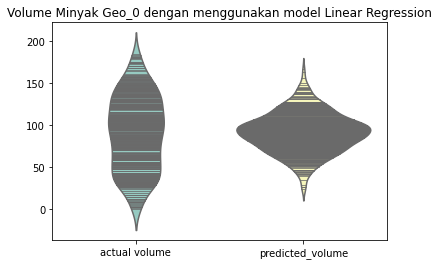

In [27]:
sns.violinplot(data=oil_vol_0.sample(500), inner="stick", palette="Set3")
plt.title('Volume Minyak Geo_0 dengan menggunakan model Linear Regression')
plt.show()

In [28]:
geo_1_oil_prediction = model_creation(geo_1)[:4]

In [29]:
geo_1_oil_prediction

(0.8894720773917386, 0.893099286775617, 68.728546895446, 68.72313602435997)

In [30]:
oil_vol_1 = model_creation(geo_1)[4]

In [31]:
oil_vol_1

,actual volume,predicted_volume
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856
...,...,...
12581,137.945408,136.869211
18456,110.992147,110.693465
73035,137.945408,137.879341
63834,84.038886,83.761966


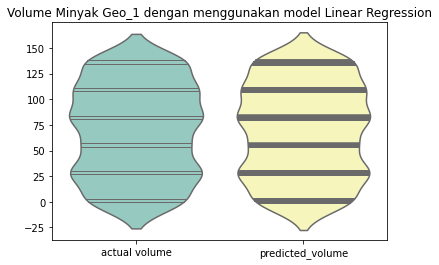

In [32]:
sns.violinplot(data=oil_vol_1.sample(500), inner="stick", palette="Set3")
plt.title('Volume Minyak Geo_1 dengan menggunakan model Linear Regression')
plt.show()

In [33]:
geo_2_oil_prediction = model_creation(geo_2)[:4]

In [34]:
oil_vol_2 = model_creation(geo_2)[4]

In [35]:
oil_vol_2

,actual volume,predicted_volume
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
...,...,...
12581,28.492402,78.765887
18456,21.431303,95.603394
73035,125.487229,99.407281
63834,99.422903,77.779912


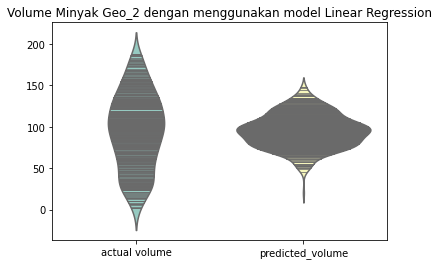

In [36]:
sns.violinplot(data=oil_vol_2.sample(500), inner="stick", palette="Set3")
plt.title('Volume Minyak Geo_2 dengan menggunakan model Linear Regression')
plt.show()

In [37]:
oil_info = [geo_0_oil_prediction, geo_1_oil_prediction, geo_2_oil_prediction]

In [38]:
linear_oil_data = pd.DataFrame(oil_info, index= ['geo_0', 'geo_1', 'geo_2'], columns = ['rmse pelatihan', 'rmse validasi', 'rata-rata volume prediksi', 'rata-rata volume sebenarnya'])

In [39]:
linear_oil_data

,rmse pelatihan,rmse validasi,rata-rata volume prediksi,rata-rata volume sebenarnya
geo_0,37.729992,37.579422,92.592568,92.078597
geo_1,0.889472,0.893099,68.728547,68.723136
geo_2,40.064260,40.029709,94.965046,94.884233


In [40]:
linear_oil_volume = [oil_vol_0, oil_vol_1, oil_vol_2]

In [41]:
count = -1
for data in linear_oil_volume:
    mae = mean_absolute_error(data['actual volume'], data['predicted_volume'])
    count += 1
    print(f'Mean absolute error of geo_{count} is {mae}')

Mean absolute error of geo_0 is 30.919600777151313
Mean absolute error of geo_1 is 0.7187662442124758
Mean absolute error of geo_2 is 32.792652105481814


#### Pelatihan model data dengan algoritma Decision Tree Regressor

In [42]:
# program penyesuaian hiperparameter decision tree
def tree_model(data):
    est_valid_rmse = []
    est_train_rmse = []
    depth_list = []
    for depth in range (1, 11):
            
            scaler = StandardScaler()
            features = data.drop(['id','product'], axis= 1)
            target = data['product']
            tf, vf, tt, vt = train_test_split(features, target, test_size = 0.25, random_state = 12345)
            scaler.fit(tf)
            tf = scaler.transform(tf)
            vf = scaler.transform(vf)
            
            model = DecisionTreeRegressor(random_state= 42, max_depth = depth)
            model.fit(tf, tt)
            train_predict = model.predict(tf)
            valid_predict = model.predict(vf)

            # Model evaluation 
            train_rmse = np.sqrt(mean_squared_error(tt, train_predict))
            valid_rmse = np.sqrt(mean_squared_error(vt, valid_predict))
            valid_mean = vt.mean()
            valid_pred_mean = valid_predict.mean()

            est_train_rmse.append(train_rmse)
            est_valid_rmse.append(valid_rmse)
            depth_list.append(depth)
            min_rmse = min(est_valid_rmse) 
            best_depth = depth_list[est_valid_rmse.index(min_rmse)]
            min_train_rmse =  est_train_rmse[est_valid_rmse.index(min_rmse)]
    
    return min_rmse, best_depth, min_train_rmse

In [43]:
# Program pembuatan modeling tree setelah penyesuaian
def tree_creation(data, depth):
    scaler = StandardScaler()
    features = data.drop(['id','product'], axis= 1)
    target = data['product']
    tf, vf, tt, vt = train_test_split(features, target, test_size = 0.25, random_state = 12345)
    scaler.fit(tf)
    tf = scaler.transform(tf)
    vf = scaler.transform(vf)
    
    model = DecisionTreeRegressor(random_state= 42, max_depth = depth)
    model.fit(tf, tt)
    train_predict = model.predict(tf)
    valid_predict = model.predict(vf)
    
    # Model evaluation 
    train_mrse = np.sqrt(mean_squared_error(tt, train_predict))
    valid_mrse = np.sqrt(mean_squared_error(vt, valid_predict))
    valid_mean = vt.mean()
    valid_pred_mean = valid_predict.mean()
    results= pd.DataFrame({'actual volume': vt, 'predicted_volume': valid_predict})
    
    
    return train_mrse, valid_mrse, valid_pred_mean, valid_mean, results

In [44]:
tree_model(geo_0)

(37.52360365915214, 8, 36.974933811349594)

In [45]:
geo_0_oil_tree_info = tree_creation(geo_0, 8)[:4]

In [46]:
geo_0_oil_tree_info

(36.974933811349594, 37.52360365915214, 92.62458698312314, 92.07859674082927)

In [47]:
tree_vol_0 = tree_creation(geo_0, 8)[4]

In [48]:
tree_vol_0

,actual volume,predicted_volume
71751,10.038645,97.130347
80493,114.551489,59.675241
2655,132.603635,74.519973
53233,169.072125,86.885904
91141,122.325180,66.677906
...,...,...
12581,170.116726,107.948358
18456,93.632175,97.259641
73035,127.352259,64.004368
63834,99.782700,118.041975


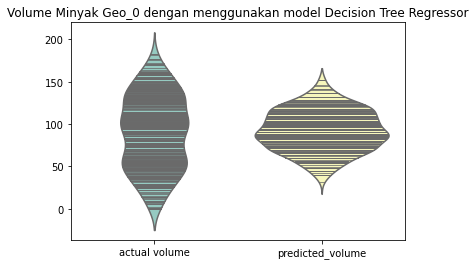

In [49]:
sns.violinplot(data=tree_vol_0.sample(500), inner="stick", palette="Set3")
plt.title('Volume Minyak Geo_0 dengan menggunakan model Decision Tree Regressor')
plt.show()

In [50]:
tree_model(geo_1)

(0.7281224686589388, 6, 0.7041752898412812)

In [51]:
geo_1_oil_tree_info = tree_creation(geo_1, 6)[:4]

In [52]:
geo_1_oil_tree_info

(0.7041752898412812, 0.7281224686589388, 68.72973653109962, 68.72313602435997)

In [53]:
tree_vol_1 = tree_creation(geo_1, 6)[4]

In [54]:
tree_vol_1

,actual volume,predicted_volume
71751,80.859783,83.028704
80493,53.906522,53.913764
2655,30.132364,30.113212
53233,53.906522,53.913764
91141,0.000000,0.026481
...,...,...
12581,137.945408,137.905166
18456,110.992147,110.970860
73035,137.945408,137.905166
63834,84.038886,84.015255


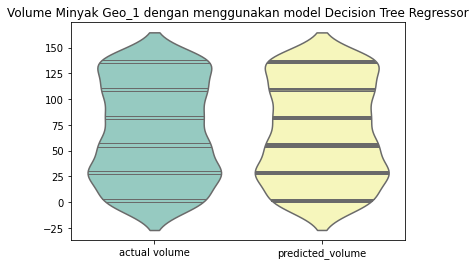

In [55]:
sns.violinplot(data=tree_vol_1.sample(500), inner="stick", palette="Set3")
plt.title('Volume Minyak Geo_1 dengan menggunakan model Decision Tree Regressor')
plt.show()

In [56]:
tree_model(geo_2)

(38.12725416420524, 7, 37.72786267400975)

In [57]:
geo_2_oil_tree_info = tree_creation(geo_2, 7)[:4]

In [58]:
geo_2_oil_tree_info

(37.72786267400975, 38.12725416420524, 94.95446820875709, 94.88423280885438)

In [59]:
tree_vol_2 = tree_creation(geo_2, 7)[4]

In [60]:
tree_vol_2

,actual volume,predicted_volume
71751,61.212375,100.001004
80493,41.850118,58.640288
2655,57.776581,99.982470
53233,100.053761,97.051191
91141,109.897122,134.412038
...,...,...
12581,28.492402,66.217063
18456,21.431303,86.776775
73035,125.487229,86.776775
63834,99.422903,66.217063


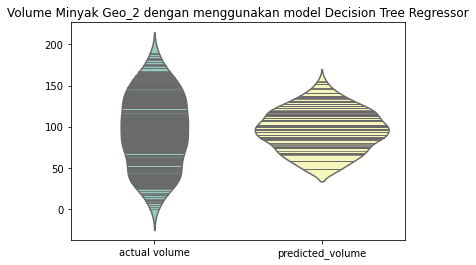

In [61]:
sns.violinplot(data=tree_vol_2.sample(500), inner="stick", palette="Set3")
plt.title('Volume Minyak Geo_2 dengan menggunakan model Decision Tree Regressor')
plt.show()

In [62]:
tree_info = [geo_0_oil_tree_info, geo_1_oil_tree_info, geo_2_oil_tree_info]

In [63]:
tree_oil_data = pd.DataFrame(tree_info, index= ['geo_0', 'geo_1', 'geo_2'], columns = ['rmse pelatihan', 'rmse validasi', 'rata-rata volume prediksi', 'rata-rata volume sebenarnya'])

In [64]:
tree_data = pd.DataFrame(tree_oil_data, index= ['geo_0', 'geo_1', 'geo_2'], columns = ['rmse pelatihan', 'rmse validasi', 'rata-rata volume prediksi', 'rata-rata volume sebenarnya'])

In [65]:
tree_data

,rmse pelatihan,rmse validasi,rata-rata volume prediksi,rata-rata volume sebenarnya
geo_0,36.974934,37.523604,92.624587,92.078597
geo_1,0.704175,0.728122,68.729737,68.723136
geo_2,37.727863,38.127254,94.954468,94.884233


In [66]:
tree_oil_volume = [tree_vol_0, tree_vol_1, tree_vol_2]

In [67]:
count = -1
for data in tree_oil_volume:
    mae = mean_absolute_error(data['actual volume'], data['predicted_volume'])
    count += 1
    print(f'Mean absolute error of geo_{count} is {mae}')

Mean absolute error of geo_0 is 30.822885935977613
Mean absolute error of geo_1 is 0.32400706240313176
Mean absolute error of geo_2 is 31.43575414732737


### 3.4. Kesimpulan Bab

Data-data yang diperlukan untuk penilaian volume minyak setiap lokasi berhasil dibuat. Terlihat bahwa data volume minyak hasil prediksi dua model memiliki distribusi dan nilai mean yang mirip. Akan tetapi prediksi minyak yang dibuat menggunakan model decision tree memiliki root mean squared error dan mean absolute error yang sedikit lebih kecil dibandingkan model regresi linear, sehingga model pohon sedikit lebih akurat. Berdasarkan data evaluasi metriks disimpulkan bahwa lokasi Geo_1 memiliki model yang paling akurat.

## Analisis Data Profit

Pada tahapan ini, akan diperoleh data umum volume minyak total, total pendapatan, dan total profit setiap lokasi serta rata-rata error untuk parameter-parameter tersebut.

### 4.1. Pembuatan fungsi

Pada tahapan ini, fungsi untuk menghasilkan total profit setiap wilayah. Akan dipilih 200 wilayah dengan keuntungan rata-rata tertinggi bedasarkan prediksi. Total investasi biaya adalah 100 juta dolar untuk 200 sumur.

In [68]:
def profit(data):
    
    selected_well = data.sort_values(by= 'predicted_volume', ascending= False).head(200)
    total_volume = selected_well['actual volume'].sum()
    total_profit = total_volume*4500 - 100000000

    return total_profit

### Penyimpanan profit setiap lokasi 

#### Penyimpanan profit model regresi linear

Pada tahapan ini, total profit setiap lokasi akan disimpan. 

In [69]:
profit_0 = profit(oil_vol_0)

In [70]:
print(f'Rata-rata profit untuk wilayah geo_0 adalah {profit_0:.2f} unit')

Rata-rata profit untuk wilayah geo_0 adalah 33208260.43 unit


In [71]:
profit_1 = profit(oil_vol_1)

In [72]:
print(f'Rata-rata profit untuk wilayah geo_1 adalah {profit_1:.2f} unit')

Rata-rata profit untuk wilayah geo_1 adalah 24150866.97 unit


In [73]:
profit_2 = profit(oil_vol_2)

In [74]:
print(f'Rata-rata profit untuk wilayah geo_2 adalah {profit_2:.2f} unit')

Rata-rata profit untuk wilayah geo_2 adalah 27103499.64 unit


#### Penyimpanan profit prediksi model Decision Tree Regressor

In [75]:
tree_profit_0 = profit(tree_vol_0)

In [76]:
print(f'Rata-rata profit untuk wilayah geo_0 adalah {tree_profit_0:.2f} unit')

Rata-rata profit untuk wilayah geo_0 adalah 27914281.23 unit


In [77]:
tree_profit_1 = profit(tree_vol_1)

In [78]:
print(f'Rata-rata profit untuk wilayah geo_0 adalah {tree_profit_1:.2f} unit')

Rata-rata profit untuk wilayah geo_0 adalah 24107949.08 unit


In [79]:
tree_profit_2 = profit(tree_vol_2)

In [80]:
tree_profit_2

32799660.917651027

### Kesimpulan Bab

Profit total setiap wilayah ditemukan dengan menggunakan fungsi profit untuk setiap wilayah. Ditemukan bahwa untuk ketika profit dihitung menggunakan prediksi linear regresi, wilayah geo_0 memiliki profit paling tinggi. Sementara itu, ketika profit dihitung dengan menggunakan prediksi regresi pohon, ditemukan bahwa lokasi geo_2 memiliki profit paling tinggi. Akan tetapi perhitungan ini belum mencakup rentang profit yang mungkin diperoleh serta resiko kerugianya. Untuk menemukan hal tersebut perlu dilakukan bootstrapping fungsi profit pada masing-masing wilayah.

## Bootstraping model 

### Bootstrapping profit model for linear regression prediction

In [81]:
def bootstrap_function(data, n):
    
    values = []
    state = np.random.RandomState(10)
    for i in range(n):
        sample = data.sample(500, random_state= state)
        subsample = profit(sample)
        values.append(subsample)
    values = pd.Series(values)
    
    return values

In [82]:
def profit_risk(dataframe):
    values = bootstrap_function(data= dataframe, n= 1000)
    alpha = 0.05
    confidence = 0.95
    mean = int(values.mean())
    risk = (values<0).mean()*100
    lower_revenue = int(values.quantile(alpha/2))
    upper_revenue = int(values.quantile((1-alpha)/2))
    return mean, lower_revenue, upper_revenue, risk

In [83]:
bootstraped_data_0 = profit_risk(oil_vol_0)

In [84]:
bootstraped_data_1 = profit_risk(oil_vol_1)

In [85]:
bootstraped_data_2 = profit_risk(oil_vol_2)

In [86]:
bootstrapped_data = pd.DataFrame([bootstraped_data_0, bootstraped_data_1 , bootstraped_data_2 ], index= ['geo_0', 'geo_1', 'geo_2'], columns = ['rata-rata_profit', 'quantil bawah profit', 'quantil atas profit', 'risk'])

In [87]:
bootstrapped_data

,rata-rata_profit,quantil bawah profit,quantil atas profit,risk
geo_0,3873167,-1257082,3765658,7.7
geo_1,4452533,550633,4284862,1.4
geo_2,3945484,-1331681,3671873,8.0


### Bootstrapping profit model untuk prediksi pohon regressor

In [88]:
bootstraped_tree_profit_0 = profit_risk(tree_vol_0)

In [89]:
bootstraped_tree_profit_1 = profit_risk(tree_vol_1)

In [90]:
bootstraped_tree_profit_2 = profit_risk(tree_vol_2)

In [91]:
bootstrapped_tree_profit = pd.DataFrame([bootstraped_tree_profit_0, bootstraped_tree_profit_1 , bootstraped_tree_profit_2], index= ['geo_0', 'geo_1', 'geo_2'], columns = ['rata-rata_profit', 'quantil bawah profit', 'quantil atas profit', 'resiko kerugian'])

In [92]:
bootstrapped_tree_profit

,rata-rata_profit,quantil bawah profit,quantil atas profit,resiko kerugian
geo_0,4268668,-1048157,4172170,5.4
geo_1,4451031,537042,4291704,1.4
geo_2,6243254,927349,6065349,1.2


### Kesimpulan bab

Analisis bootstrapping data dilakukan pada perhitungan profit volume minyak yang diprediksi oleh model linear regressi dan pohon regresi. Analisis bootstraping profit prediksi regresi linear menunjukkan bahwa wilayah geo_1 memiliki rata-rata profit yang paling baik dengan persebaran rentang profit yang sempit. Selain itu, bootstrapping profit wilayah geo_1 menggunakan model regresi linear memiliki nilai quantil bawah yang lebih tinggi dan resiko kerugian yang paling rendah dibandingkan wilayah lain. Sementara itu ketika bootstrapping profit dilakukan pada data volume minyak yang diprediksi menggunakan model pohon regresi, ditemukan bahwa geo_2 merupakan wilayah dengan rata-rata profit dan quartil bawah yang tinggi, serta resiko kerugian yang paling rendah meskipun memiliki rentang profit yang luas. Kedua model tersebut menghasilkan kesimpulan yang berbeda, maka performa setiap model perlu dievaluasi terlebih dahulu dengan cross validasi. 

## Analisis cross validasi model

Pada tahapan ini akan dievaluasi performa setiap model menggunakan cross validasi. Model yang akan dievaluasi adalah linear regression dan tree decision regressor yang akan diuji pada setiap file wilayah. Khusus untuk model decision tree, depth akan diatur menjadi 7 sesuai dengan pengaturan model geo_2 terbaik dari tahapan sebelumnya. 

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
model_1 = LinearRegression()

In [95]:
model_2 = DecisionTreeRegressor(random_state= 42, max_depth = 7)

In [96]:
models = [model_1, model_2]

In [97]:
def cross_val(data, model):
    scaler = StandardScaler()
    
    features = data.drop(['id','product'], axis= 1)
    scaler.fit(features)
    features = scaler.transform(features)
    target = data['product']
    scores = cross_val_score(model, features, target, cv= 5)
    final_score = sum(scores)/len(scores)
    return final_score

In [98]:
for model in models:
    count = -1
    for data in [geo_0, geo_1, geo_2]:
        
        val_score= cross_val(data, model)
        count += 1
        print(f'Cross validation value of model {model} for region geo_{count} is {val_score}')
        print('')

Cross validation value of model LinearRegression() for region geo_0 is 0.27549130726904475

Cross validation value of model LinearRegression() for region geo_1 is 0.9996243728923553

Cross validation value of model LinearRegression() for region geo_2 is 0.1987156246205129

Cross validation value of model DecisionTreeRegressor(max_depth=7, random_state=42) for region geo_0 is 0.27716964548477774

Cross validation value of model DecisionTreeRegressor(max_depth=7, random_state=42) for region geo_1 is 0.9997545841987663

Cross validation value of model DecisionTreeRegressor(max_depth=7, random_state=42) for region geo_2 is 0.27189458829632385



### Kesimpulan Bab

Berdasarkan analisis cross validasi model, terlihat bahwa model pohon regresi memiliki performa yang lebih baik dibandingkan regresi linear. Meski begitu, tingkat akurasi prediksi untuk wilayah geo_1 sangat tinggi untuk kedua model. Selain itu, perlu diperhatikan bahwa penggunaan model pohon regresi memiliki permasalahan terhadap outlier. 

## Kesimpulan Umum

Setelah dilakukan analisa projek ini, terdapat beberapa poin yang dapat diambil. Pembelajaran data oleh machine learning dapat diperbaiki dengan bootstraping. Hal ini dapat terlihat ketika prediksi menggunakan model saja, lokasi yang memiliki profit baik adalah geo_0, akan tetapi setelah dilakukan bootstrapping, terlihat bahwa area geo_1 yang memiliki rata-rata dan rentang kuartil yang lebih tinggi dibandingkan kedua wilayah lainya ketika diprediksi menggunakan linear regresi. Sedangkan ketika model pohon regresi digunakan, terlihat area geo_2 yang memiliki rata-rata dan rentang kuartil yang lebih tinggi. Cross validasi menunjukkan bahwa model pohon regresi menunjukan performa yang lebih baik. Disimpulkan bahwa apabila perusahaan mengingikan profit yang lebih tinggi, disarankan untuk memilih wilayah geo_2. Akan tetapi apabila perusahaan lebih menginginkan wilayah dengan dengan prediksi yang paling akurat, maka disarankan untuk memilih wilayah geo_1.